In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

grandparent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

csv_file_path = os.path.join(grandparent_dir, 'crop_recommendation.csv')

In [6]:
# Load the data
data = pd.read_csv(csv_file_path)

In [7]:
# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [10]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

Test Accuracy: 0.9841
Precision: 0.9831
Recall: 0.9855
F1-Score: 0.9841


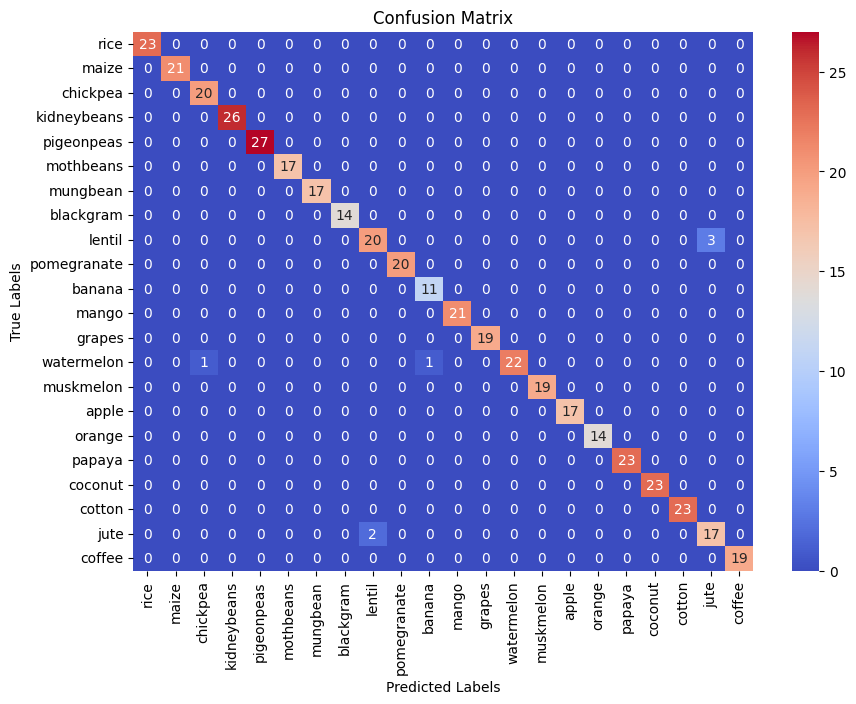

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=data['label'].unique(), columns=data['label'].unique())

print("Test Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()